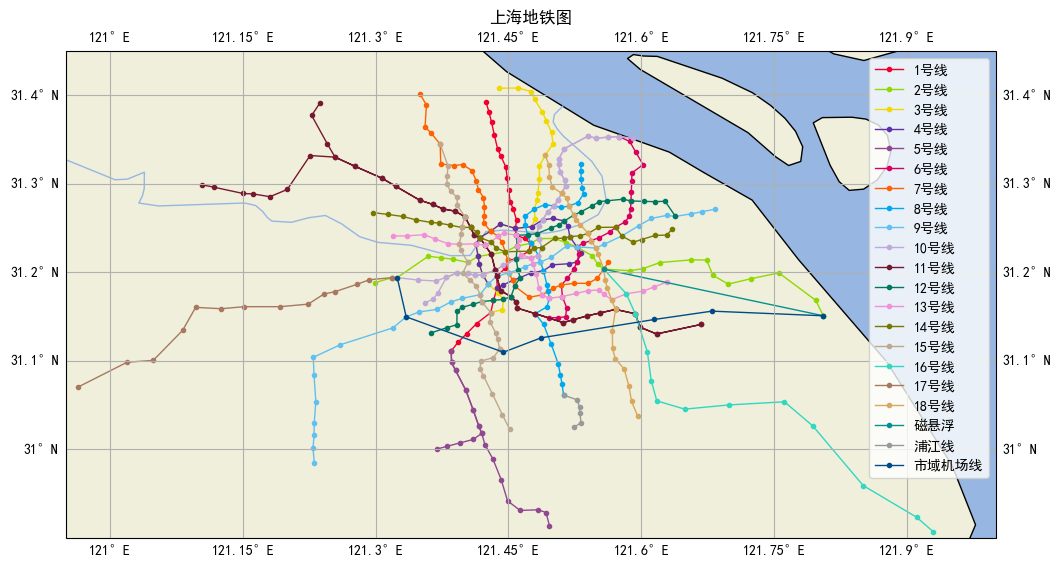

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取Excel文件
file_path = "上海.xlsx" 
df = pd.read_excel(file_path)

# 提取数据
longitudes = df.iloc[:, 4]  # 第五列是经度
latitudes = df.iloc[:, 5]   # 第六列是纬度
line_names = df.iloc[:, 8]  # 第九列是线路名称

# 创建地图
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置地图范围（上海的大致经纬度范围）
ax.set_extent([120.95, 122.0, 30.9, 31.45], crs=ccrs.PlateCarree())

# 添加地理特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

line_colors = {
    '1号线': '#F00030',  # 1号线正红色
    '2号线': '#90D800',  # 2号线翠绿色
    '3号线': '#F0D800',  # 3号线明黄色
    '4号线': '#6030A8',  # 4号线薰衣草紫
    '5号线': '#904890',  # 5号线紫红色
    '5号线1': '#904890',  # 5号线紫红色
    '6号线': '#D80060',  # 6号线品红色
    '7号线': '#FF6000',  # 7号线橙色
    '8号线': '#00A8F0',  # 8号线蓝色
    '9号线': '#60C0F0',  # 9号线天蓝色
    '10号线': '#C0A8D8',  # 10号线浅紫色
    '10号线1': '#C0A8D8',  # 10号线浅紫色
    '11号线': '#781830',  # 11号线深红色
    '12号线': '#007860',  # 12号线深绿色
    '13号线': '#F090D8',  # 13号线粉色
    '14号线': '#787800',  # 14号线橄榄绿
    '15号线': '#C0A890',  # 15号线卡其色
    '16号线': '#30D8C0',  # 16号线水绿色
    '17号线': '#A87860',  # 17号线浅棕色
    '18号线': '#D8A860',  # 18号线土黄色
    '磁悬浮': '#049291',
    '浦江线': '#999999',
    '市域机场线':'#004B87'

}

# 绘制地铁线路
for line_name, color in line_colors.items():
    # 筛选当前线路的站点
    line_data = df[df.iloc[:, 8] == line_name]
    lons = line_data.iloc[:, 4]  # 经度
    lats = line_data.iloc[:, 5]  # 纬度
    if line_name not in ['5号线1', '10号线1']:  # 跳过5号线1和10号线1的标签
        ax.plot(lons, lats, marker='o', color=color, label=line_name, markersize=3, linewidth=1)
    else:
        ax.plot(lons, lats, marker='o', color=color, markersize=3, linewidth=1)  

# 添加图例
ax.legend(loc='upper right')

# 添加网格线
ax.gridlines(draw_labels=True)

# 显示地图
plt.title('上海地铁图')
plt.savefig("shanghai.jpg", dpi = 300)
plt.show()